<a href="https://colab.research.google.com/github/Trixie18/ckd-classification-using-rf-gb-svm-knn/blob/main/CKD_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chronic Kidney Disease Classification**

Hi, I'm Trixie, and this is a simple classification project I've done during my spare time. This project utilized UC Irvine's Chronic Kidney Dataset. I've implemented KNN, Random Forest, Gradient Boosting, and Support Vector Machines.

In [ ]:
pip install ucimlrepo

**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


**Loading Data**

In [ ]:
ckd = fetch_ucirepo(id=336)

ckd_df = pd.DataFrame(ckd.data.features)
ckd_df['class'] = ckd.data.targets

In [ ]:
print(ckd_df.head())
print(ckd_df.info())

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data

**Data Preparation**

Cleaning and Imputations

In [ ]:
cat_cols = [col for col in ckd_df.columns if ckd_df[col].dtype == 'object']
num_cols = [col for col in ckd_df.columns if ckd_df[col].dtype != 'object']

for col in cat_cols:
  print(f"The {col} column has {ckd_df[col].unique()} unique values")

The rbc column has [nan 'normal' 'abnormal'] unique values
The pc column has ['normal' 'abnormal' nan] unique values
The pcc column has ['notpresent' 'present' nan] unique values
The ba column has ['notpresent' 'present' nan] unique values
The htn column has ['yes' 'no' nan] unique values
The dm column has ['yes' 'no' '\tno' nan] unique values
The cad column has ['no' 'yes' nan] unique values
The appet column has ['good' 'poor' nan] unique values
The pe column has ['no' 'yes' nan] unique values
The ane column has ['no' 'yes' nan] unique values
The class column has ['ckd' 'ckd\t' 'notckd'] unique values


In [ ]:
# 'dm' and 'class' columns has typos

ckd_df['dm'].replace({'\tno': 'no'}, inplace=True)
ckd_df['class'].replace({'ckd\t': 'ckd'}, inplace=True)

In [ ]:
# lez check

for col in cat_cols:
  print(f"The {col} column has {ckd_df[col].unique()} unique values")

The rbc column has [nan 'normal' 'abnormal'] unique values
The pc column has ['normal' 'abnormal' nan] unique values
The pcc column has ['notpresent' 'present' nan] unique values
The ba column has ['notpresent' 'present' nan] unique values
The htn column has ['yes' 'no' nan] unique values
The dm column has ['yes' 'no' nan] unique values
The cad column has ['no' 'yes' nan] unique values
The appet column has ['good' 'poor' nan] unique values
The pe column has ['no' 'yes' nan] unique values
The ane column has ['no' 'yes' nan] unique values
The class column has ['ckd' 'notckd'] unique values


In [ ]:
#checking for missing values

ckd_df.isna().sum().sort_values(ascending=False)

,0
rbc,152
rbcc,131
wbcc,106
pot,88
sod,87
pcv,71
pc,65
hemo,52
su,49
sg,47


In [ ]:
# random sampling imputation for numeric columns
# mode imputation for categorical columns

def random_imputation(column):
  random_sample = ckd_df[column].dropna().sample(ckd_df[column].isna().sum())
  random_sample.index = ckd_df[ckd_df[column].isnull()].index
  ckd_df.loc[ckd_df[column].isnull(), column] = random_sample

def mode_imputation(column):
    mode = ckd_df[column].mode()[0]
    ckd_df[column] = ckd_df[column].fillna(mode)

for col in num_cols:
  random_imputation(col)

for col in cat_cols:
  mode_imputation(col)

ckd_df.isna().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


**Feature Engineering**

In [ ]:
for col in cat_cols:
  print(f"The {col} column has {ckd_df[col].nunique()} unique values")

The rbc column has 2 unique values
The pc column has 2 unique values
The pcc column has 2 unique values
The ba column has 2 unique values
The htn column has 2 unique values
The dm column has 2 unique values
The cad column has 2 unique values
The appet column has 2 unique values
The pe column has 2 unique values
The ane column has 2 unique values
The class column has 2 unique values


In [ ]:
# since all of our categorical columns are binary (i.e. has 2 categories), we'll convert them into binary (0,1) using LabelEncoder

for col in cat_cols:
  ckd_df[col] = LabelEncoder().fit_transform(ckd_df[col])

ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,182.0,...,38.0,6000.0,4.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,2.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


**Model Preparation**

In [ ]:
X = ckd_df[[col for col in ckd_df.columns if col != 'class']]
y = ckd_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Execution**

In [ ]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of GB is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of GB is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of GB is 1.0
Test Accuracy of GB is 0.975 

Confusion Matrix :- 
[[52  0]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
# Support Vector Machines (SVM)

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

svm_acc = accuracy_score(y_test, svm.predict(X_test))

print(f"Training Accuracy of SVM is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Test Accuracy of SVM is {svm_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of SVM is 0.965625
Test Accuracy of SVM is 0.9625 

Confusion Matrix :- 
[[50  2]
 [ 1 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
# Random Forest (RF)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Training Accuracy of RF is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Test Accuracy of RF is {rf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(X_test))}")

Training Accuracy of RF is 1.0
Test Accuracy of RF is 0.975 

Confusion Matrix :- 
[[52  0]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
# K-Nearest Neighbors (KNN)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.81875
Test Accuracy of KNN is 0.7625 

Confusion Matrix :- 
[[40 12]
 [ 7 21]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        52
           1       0.64      0.75      0.69        28

    accuracy                           0.76        80
   macro avg       0.74      0.76      0.75        80
weighted avg       0.78      0.76      0.77        80



**Visualizations and Summaries**



In [ ]:
models = pd.DataFrame({
    'Model' : [ 'K-Nearest Neighbors', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'Support Vector Machines'],
    'Score' : [knn_acc, rf_acc, gb_acc, svm_acc]
})

models

,Model,Score
0,K-Nearest Neighbors,0.7625
1,Random Forest Classifier,0.9750
2,Gradient Boosting Classifier,0.9750
3,Support Vector Machines,0.9625


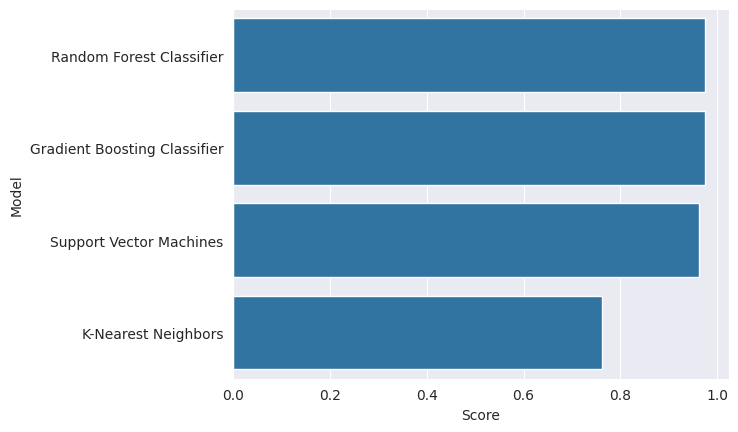

In [ ]:
sns.barplot(data=models, y='Model', x='Score', order=models.sort_values('Score', ascending=False)['Model'])
sns.set_style('darkgrid')
plt.show()

**Conclusion:**

Random Forest (RF) and Gradient Boosting Classifier (GB) won with a tied accuracy score of 0.975.

This means that both RF and GB correctly classified the presence of Chronic Kidney Disease (CKD) in the dataset, 97.5% of the time. While this is high, we are yet to investigate overfitting, class imbalance, etc. Take a look at my other projects for a deeper application of Machine Learning techniques from the most random datasets to everyday insights and useful business solutions.

**Author's Footnote**

Please note that this project did not involve hyperparameter tuning as this was literally done in my phone while I was waiting for my girlfriend to finish using my laptop for her studies. Haha!

# Thank you for checking out my project!